Вариант 7:
$$
\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial^2{u}} {\partial{x^2}} + \frac {\partial^2{u}} {\partial{y^2}} -x \cdot y \cdot sin(t), \\
u(0, y, t) = 0 \\
u(1, y, t) = y \cdot cos(t) \\
u(x, 0, t) = 0 \\
u(x, 1, t) = x \cdot cos(t) \\
u(x, y, 0) = x \cdot y
\end{align}
$$

Аналитическое решение:
\begin{align}
U(x, y, t) = x \cdot y \cdot cos(t)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nu1 = 1
nu2 = 1
lx = np.pi
ly = np.pi
nx = 11
ny = 11
tau = 0.01
nt = 100

hx = lx / (nx - 1)
hy = ly / (ny - 1)
x = [i*hx for i in range(nx)]
y = [i*hy for i in range(ny)]

In [3]:
def U_0_y_t(y,t):
    return np.cos(nu2*y)*np.exp(-(nu1**2 + nu2**2)*t)

def U_l_y_t(y,t):
    return (-1)**nu1*np.cos(nu2*y)*np.exp(-(nu1**2 + nu2**2)*t)

def U_x_0_t(x,t):
    return np.cos(nu1*x)*np.exp(-(nu1**2 + nu2**2)*t)

def U_x_l_t(x,t):
    return (-1)**nu2*np.cos(nu1*x)*np.exp(-(nu1**2 + nu2**2)*t)

def U_x_y(x,y):
    return np.cos(nu1*x)*np.cos(nu2*y)

def U_ans(x,y,t):
    return np.cos(nu1*x)*np.cos(nu2*y)*np.exp(-(nu1**2 + nu2**2)*t)

In [4]:
def trid_alg(matrix, vec):
    s = len(vec)
    ans = np.zeros(s)
    p = np.zeros(s)
    q = np.zeros(s)

    p[0] = -matrix[0][1] / matrix[0][0]
    q[0] = vec[0] / matrix[0][0]

    for i in range(1, s - 1):
        p[i] = -matrix[i][i + 1] / (matrix[i][i] + matrix[i][i - 1] * p[i - 1])
        q[i] = (vec[i] - matrix[i][i - 1] * q[i - 1]) / (
            matrix[i][i] + matrix[i][i - 1] * p[i - 1]
        )

    p[s - 1] = 0
    q[s - 1] = (vec[s - 1] - matrix[s - 1][s - 2] * q[s - 2]) / (
        matrix[s - 1][s - 1] + matrix[s - 1][s - 2] * p[s - 2]
    )

    ans[s - 1] = q[s - 1]

    for i in range(s - 2, -1, -1):
        ans[i] = p[i] * ans[i + 1] + q[i]

    return 

In [5]:
ans = np.zeros((nt,nx,ny))
for i in range(nx):
    for j in range(ny):
        ans[0][i][j] = U_x_y(hx*i, hy*j)

In [6]:
for k in range(nt - 1):
    Uk12 = np.zeros((nx,ny))
    for i in range(nx):
        ans[k+1][i][0] =  U_x_0_t(i*hx,tau*(k+1))
        ans[k+1][i][-1] =  U_x_l_t(i*hx,tau*(k+1))
        Uk12[i][0] = U_x_0_t(i*hx,tau*k + tau/2)
        Uk12[i][-1] = U_x_l_t(i*hx,tau*k + tau/2)
    for i in range(ny):
        ans[k+1][0][i] =  U_0_y_t(i*hy,tau*(k+1))
        ans[k+1][-1][i] =  U_l_y_t(i*hy,tau*(k+1))
        Uk12[0][i] =  U_0_y_t(i*hy,tau*k + tau/2)
        Uk12[-1][i] =  U_l_y_t(i*hy,tau*k + tau/2)
    

    for j in range(1, ny-1):
        solve_mat = np.zeros((nx,nx))
        vec = np.zeros(nx)
        denominator = 2*tau*hy**2 + 2*hy**2*hx**2
        solve_mat[0][0] = 1
        solve_mat[-1][-1] = 1
        vec[0] = U_0_y_t(hy*j, tau*k+tau/2)
        vec[-1] = U_l_y_t(hy*j, tau*k+tau/2)
        for i in range(1,nx-1):
            solve_mat[i][i] = denominator
            solve_mat[i][i-1] = -tau*hy**2
            solve_mat[i][i+1] = -tau*hy**2
            vec[i] = (
                ans[k][i][j+1]*tau*hx**2
                + ans[k][i][j-1]*tau*hx**2
                + ans[k][i][j]*(2*hx**2*hy**2 - 2*tau*hx**2)
                )
        x_solve = np.linalg.solve(solve_mat, vec)
        Uk12[:,j] = x_solve
    
    for i in range(1, nx-1):
        solve_mat = np.zeros((ny,ny))
        vec = np.zeros(ny)
        denominator = 2*tau*hx**2 + 2*hy**2*hx**2
        solve_mat[0][0] = 1
        solve_mat[-1][-1] = 1
        vec[0] = U_x_0_t(hx*i, tau*(k+1))
        vec[-1] = U_x_l_t(hx*i, tau*(k+1))
        for j in range(1,ny-1):
            solve_mat[j][j] = denominator
            solve_mat[j][j-1] = -tau*hx**2
            solve_mat[j][j+1] = -tau*hx**2
            vec[j] = (
                Uk12[i+1][j]*tau*hy**2
                + Uk12[i-1][j]*tau*hy**2
                + Uk12[i][j]*(2*hx**2*hy**2 - 2*tau*hy**2)
                )
        y_solve = np.linalg.solve(solve_mat, vec)
        ans[k+1][i,:] = y_solve

Text(0.5, 0, 'x')

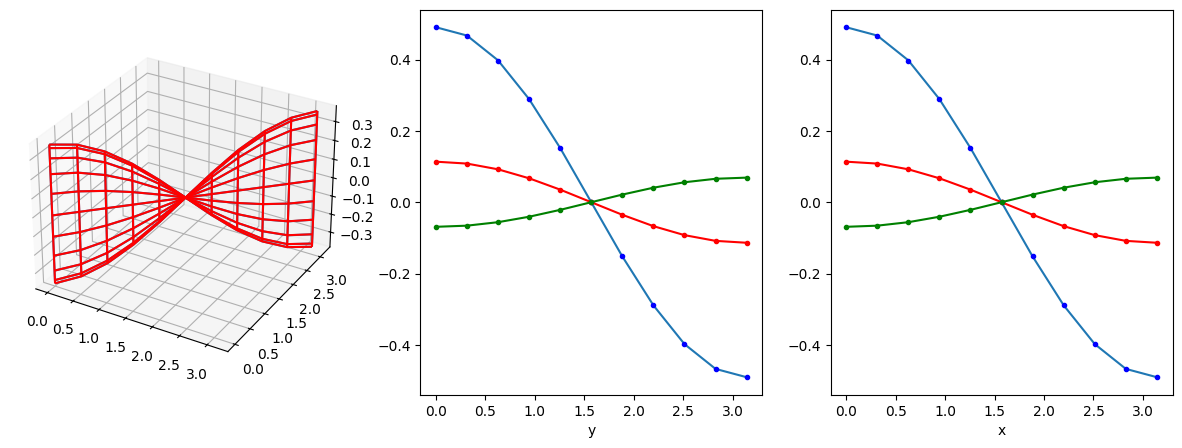

In [7]:
z_ans = np.zeros((nt,nx,ny))
for k in range(nt):
    for i in range(nx):
        for j in range(ny):
            z_ans[k][i][j] = U_ans(hx*i, hy*j, tau*k)
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(x, y, ans[nt//2])
ax_3d.plot_wireframe(x, y, z_ans[nt//2], color = 'r')
axx = fig.add_subplot(1,3,2)
axx.plot(y, ans[nt // 4][nx // 4])
axx.plot(y, z_ans[nt // 4][nx // 4], '.b')
# axx.plot(y, ans[5][nx // 4])
# axx.plot(y, z_ans[5][nx // 4], '.b')
axx.plot(y, ans[nt // 4 * 2][nx // 4 * 2], 'r')
axx.plot(y, z_ans[nt // 4 * 2][nx // 4 * 2], '.r')
axx.plot(y, ans[nt // 4 * 3][nx // 4 * 3], 'g')
axx.plot(y, z_ans[nt // 4 * 3][nx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(x, ans[nt // 4][:, ny // 4])
axy.plot(x, z_ans[nt // 4][:, ny // 4], '.b')
axy.plot(x, ans[nt // 4 * 2][:, ny // 4 * 2], 'r')
axy.plot(x, z_ans[nt // 4 * 2][:, ny // 4 * 2], '.r')
axy.plot(x, ans[nt // 4 * 3][:, ny // 4 * 3], 'g')
axy.plot(x, z_ans[nt // 4 * 3][:, ny // 4 * 3], '.g')
plt.xlabel('x')

Time check

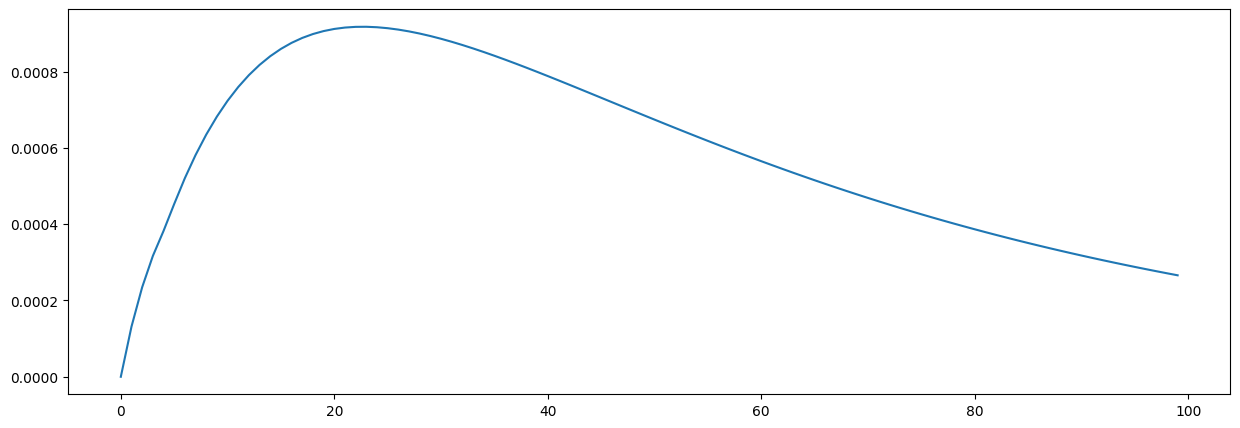

In [8]:
plt.plot(range(nt), [np.max(np.abs(ans-z_ans)[i]) for i in range(nt)])


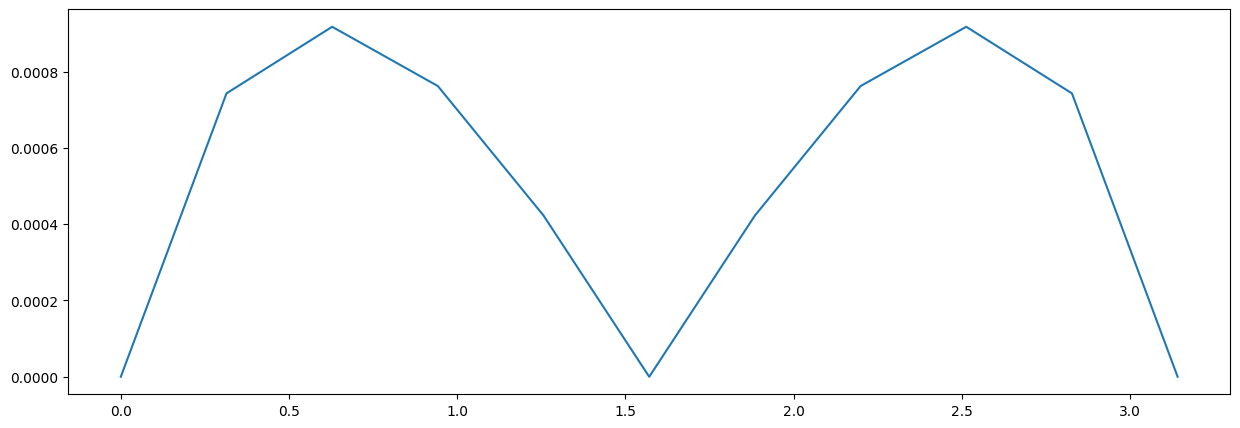

In [9]:
plt.plot(y, [np.max(np.abs(ans-z_ans)[:,:,i]) for i in range(ny)])


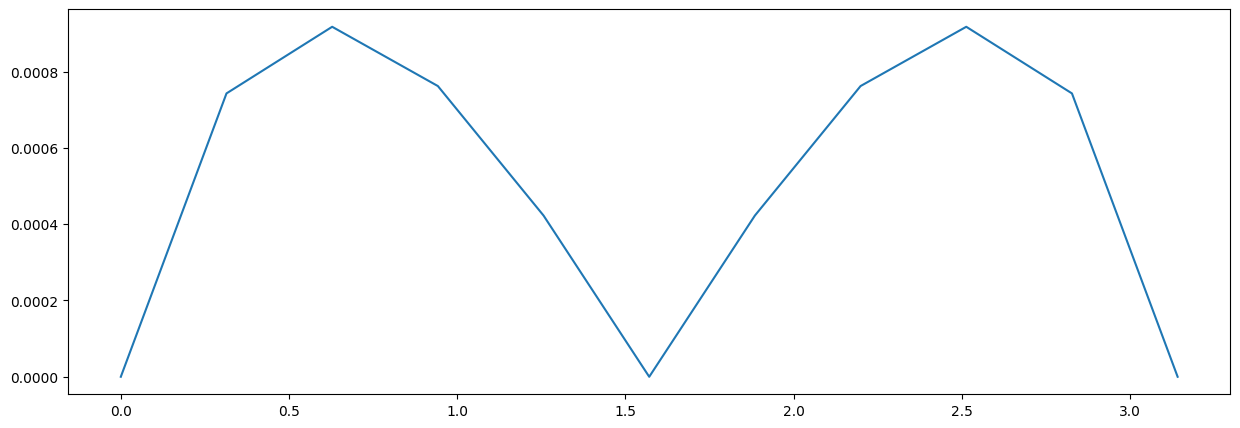

In [10]:
plt.plot(x, [np.max(np.abs(ans-z_ans)[:,i,:]) for i in range(nx)])


### Метод дробных шагов

In [11]:
ans = np.zeros((nt,nx,ny))
for i in range(nx):
    for j in range(ny):
        ans[0][i][j] = U_x_y(hx*i, hy*j)

In [12]:
for k in range(nt - 1):
    Uk12 = np.zeros((nx,ny))
    for i in range(nx):
        ans[k+1][i][0] =  U_x_0_t(i*hx,tau*(k+1))
        ans[k+1][i][-1] =  U_x_l_t(i*hx,tau*(k+1))
        Uk12[i][0] = U_x_0_t(i*hx,tau*k + tau/2)
        Uk12[i][-1] = U_x_l_t(i*hx,tau*k + tau/2)
    for i in range(ny):
        ans[k+1][0][i] =  U_0_y_t(i*hy,tau*(k+1))
        ans[k+1][-1][i] =  U_l_y_t(i*hy,tau*(k+1))
        Uk12[0][i] =  U_0_y_t(i*hy,tau*k + tau/2)
        Uk12[-1][i] =  U_l_y_t(i*hy,tau*k + tau/2)
    

    for j in range(1, ny-1):
        solve_mat = np.zeros((nx,nx))
        vec = np.zeros(nx)
        denominator = 2*tau + hx**2
        solve_mat[0][0] = 1
        solve_mat[-1][-1] = 1
        vec[0] = U_0_y_t(hy*j, tau*k+tau/2)
        vec[-1] = U_l_y_t(hy*j, tau*k+tau/2)
        for i in range(1,nx-1):
            solve_mat[i][i] = denominator
            solve_mat[i][i-1] = -tau
            solve_mat[i][i+1] = -tau
            vec[i] = ans[k][i][j]*hx**2
        x_solve = np.linalg.solve(solve_mat, vec)
        Uk12[:,j] = x_solve
    
    for i in range(1, nx-1):
        solve_mat = np.zeros((ny,ny))
        vec = np.zeros(ny)
        denominator = 2*tau + hy**2
        solve_mat[0][0] = 1
        solve_mat[-1][-1] = 1
        vec[0] = U_x_0_t(hx*i, tau*(k+1))
        vec[-1] = U_x_l_t(hx*i, tau*(k+1))
        for j in range(1,ny-1):
            solve_mat[j][j] = denominator
            solve_mat[j][j-1] = -tau
            solve_mat[j][j+1] = -tau
            vec[j] = Uk12[i][j]*hy**2
        y_solve = np.linalg.solve(solve_mat, vec)
        ans[k+1][i,:] = y_solve

Text(0.5, 0, 'x')

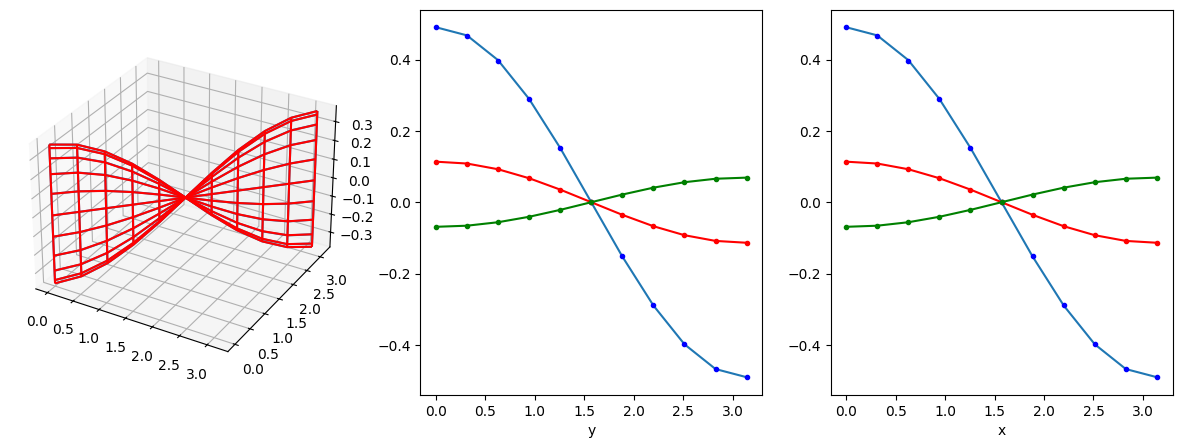

In [13]:
z_ans = np.zeros((nt,nx,ny))
for k in range(nt):
    for i in range(nx):
        for j in range(ny):
            z_ans[k][i][j] = U_ans(hx*i, hy*j, tau*k)
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(x, y, ans[nt//2])
ax_3d.plot_wireframe(x, y, z_ans[nt//2], color = 'r')
axx = fig.add_subplot(1,3,2)
axx.plot(y, ans[nt // 4][nx // 4])
axx.plot(y, z_ans[nt // 4][nx // 4], '.b')
# axx.plot(y, ans[5][nx // 4])
# axx.plot(y, z_ans[5][nx // 4], '.b')
axx.plot(y, ans[nt // 4 * 2][nx // 4 * 2], 'r')
axx.plot(y, z_ans[nt // 4 * 2][nx // 4 * 2], '.r')
axx.plot(y, ans[nt // 4 * 3][nx // 4 * 3], 'g')
axx.plot(y, z_ans[nt // 4 * 3][nx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(x, ans[nt // 4][:, ny // 4])
axy.plot(x, z_ans[nt // 4][:, ny // 4], '.b')
axy.plot(x, ans[nt // 4 * 2][:, ny // 4 * 2], 'r')
axy.plot(x, z_ans[nt // 4 * 2][:, ny // 4 * 2], '.r')
axy.plot(x, ans[nt // 4 * 3][:, ny // 4 * 3], 'g')
axy.plot(x, z_ans[nt // 4 * 3][:, ny // 4 * 3], '.g')
plt.xlabel('x')

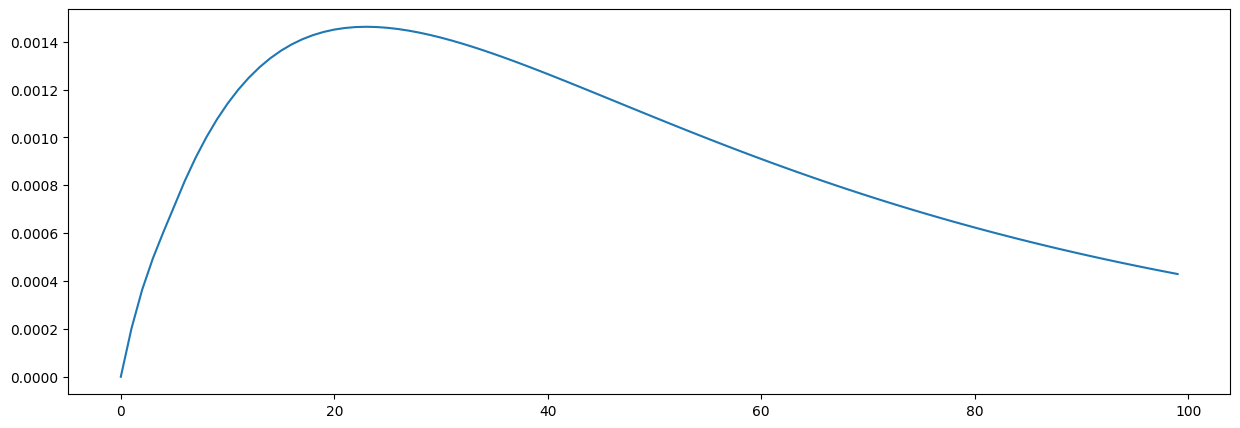

In [14]:
plt.plot(range(nt), [np.max(np.abs(ans-z_ans)[i]) for i in range(nt)])


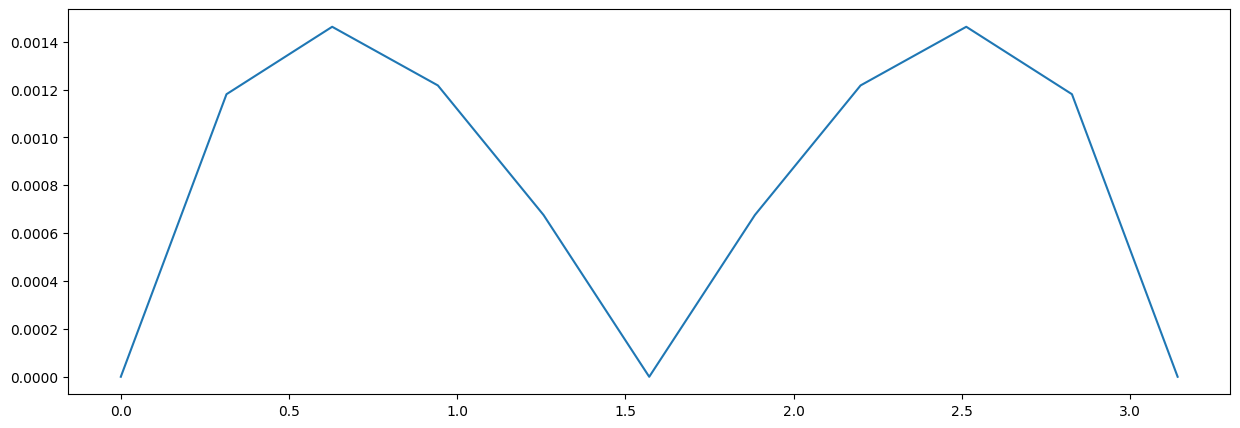

In [15]:
plt.plot(y, [np.max(np.abs(ans-z_ans)[:,:,i]) for i in range(ny)])


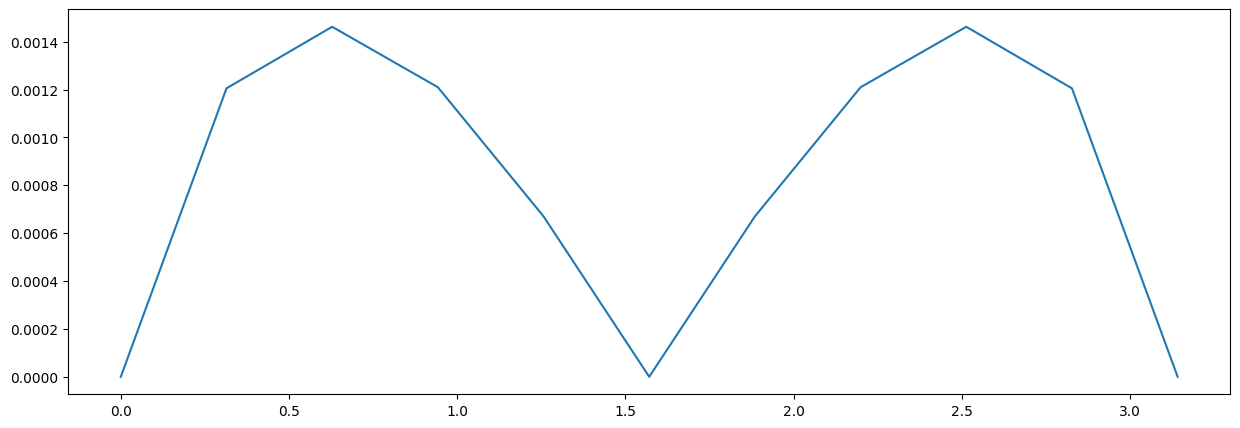

In [16]:
plt.plot(x, [np.max(np.abs(ans-z_ans)[:,i,:]) for i in range(nx)])
